# Intersecting SIDs

In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs
import numpy
import pystare

In [2]:
proj = ccrs.PlateCarree()
transf = ccrs.PlateCarree()

In [3]:
def plot1(lon, lat, lons, lats, triang, c0='r', c1='b', transf=None, lw=1, ax=None):
    if lon is not None and ax is not None:
        x = numpy.zeros([lon.size + 1], dtype=numpy.double)
        x[:-1] = lon[:]
        x[-1] = lon[0]
        y = numpy.zeros([lat.size + 1], dtype=numpy.double)
        y[:-1] = lat[:]
        y[-1] = lat[0]
        ax.plot(x, y, True, transform=transf, c=c0)
    ax.triplot(triang, c1 + '-', transform=transf, lw=lw, markersize=3)
    ax.scatter(lons, lats, s=10, c=c1, transform=ccrs.PlateCarree())
    return

In [7]:
resolution = 6
resolution0 = resolution
lat0 = numpy.array([10, 5, 60, 70], dtype=numpy.double)
lon0 = numpy.array([-30, -20, 60, 10], dtype=numpy.double)
hull0 = pystare.cover_from_hull(lat0, lon0, resolution0)

lons0, lats0, intmat0 = pystare.triangulate_indices(hull0)
triang0 = tri.Triangulation(lons0, lats0, intmat0)

In [ ]:
resolution1 = 6
lat1 = numpy.array([10, 20, 30, 20], dtype=numpy.double)
lon1 = numpy.array([-60, 60, 60, -60], dtype=numpy.double)
hull1 = pystare.cover_from_hull(lat1, lon1, resolution1)

lons1, lats1, intmat1 = pystare.triangulate_indices(hull1)
triang1 = tri.Triangulation(lons1, lats1, intmat1)

r01 n01:  79


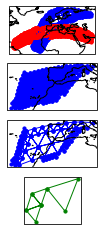

In [11]:
fig, axs = plt.subplots(4, subplot_kw={'projection': proj, 'transform': transf})

ax = axs[0]
ax.coastlines()

plot1(None, None, lons0, lats0, triang0, c0='r', c1='b', transf=transf, ax=ax)
plot1(None, None, lons1, lats1, triang1, c0='c', c1='r', transf=transf, ax=ax)

intersectedFalse = pystare.intersection(hull0, hull1, multi_resolution=False)
intersectedTrue = pystare.intersection(hull0, hull1, multi_resolution=True)

ax = axs[1]
ax.coastlines()

lonsF, latsF, intmatF = pystare.triangulate_indices(intersectedFalse)
triangF = tri.Triangulation(lonsF, latsF, intmatF)
plot1(None, None, lonsF, latsF, triangF, c0='r', c1='b', transf=transf, ax=ax)

ax = axs[2]
ax.coastlines()
lonsT, latsT, intmatT = pystare.triangulate_indices(intersectedTrue)
triangT = tri.Triangulation(lonsT, latsT, intmatT)
plot1(None, None, lonsT, latsT, triangT, c0='r', c1='b', transf=transf, ax=ax)

r0 = pystare.core.srange()
r0.add_intervals(hull0)

r1 = pystare.core.srange()
r1.add_intervals(hull1)

r01 = pystare.core.srange()
r01.add_intersect(r0, r1, False)
n01 = r01.get_size_as_values()

intersected = numpy.zeros([n01], dtype=numpy.int64)
r01.copy_values(intersected)
# See examples/test_intersect_single_res.py

r01.purge()
n01 = r01.get_size_as_values()

r01.reset()
r01.add_intersect(r0, r1, True)
n01 = r01.get_size_as_values()

print('r01 n01: ', n01)

intersected = numpy.zeros([n01], dtype=numpy.int64)
r01.copy_values(intersected)

###??? Would intervals be different?

lonsRT, latsRT, intmatRT = pystare.triangulate_indices(intersected)
triangRT = tri.Triangulation(lonsRT, latsRT, intmatRT)
ax = axs[3]

ax.coastlines()

lonsRT_, latsRT_, intmatRT_ = pystare.triangulate_indices(intersected[51:55])
triangRT_ = tri.Triangulation(lonsRT_, latsRT_, intmatRT_)

plot1(None, None, lonsRT_, latsRT_, triangRT_, c0='g', c1='g', transf=transf, ax=ax)